In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\Gaurav\OneDrive\Desktop\GemStone\data\playground-series-s3e8\train.csv")

In [3]:
len(data)

193573

In [4]:
data.head(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


# **Understanding the data**

- **id -** Unique identifier for diamonds

- **carat -** Carat (ct.) refers to the unique unit of weight measurement used exclusivley for weigh gemstone and diamonds

- **cut -** Quality of diamond cut

- **color -** Color of diamond

- **clarity -** Diamond clarity is a measure of purity and rearity of stone. 

- **depth -** The depth of the dimaond is height(in mllimeters) measured from the culet(bottom tip) to the table(flat top surface)

- **table -** A diamond's table is a facet which can be seen when the stone is viewd from face up

- **x,y,z** - x,y,z dimensions


# **Check null values**

In [5]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
data.size

2129303

In [7]:
data.shape

(193573, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [9]:
data.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [10]:
data.drop(labels=['id'], axis=1, inplace=True)

In [11]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [12]:
data.duplicated().sum()

0

In [13]:
cat_column = data.columns[data.dtypes=='object']

In [14]:
num_columns = data.columns[data.dtypes!='object']

In [15]:
data[cat_column]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [16]:
data[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [17]:
for col in num_columns:
  print(data[col].value_counts())
  print(f"Total count : {data[col].value_counts().sum()}")
  print('_____________________________________________')

carat
0.30    10758
1.01    10103
0.31     9538
0.70     7958
0.32     7548
        ...  
2.72        1
3.40        1
3.50        1
2.71        1
1.96        1
Name: count, Length: 248, dtype: int64
Total count : 193573
_____________________________________________
depth
61.9    10781
62.0    10150
61.8     9270
62.1     8866
61.6     8534
        ...  
69.4        1
68.1        1
52.1        1
55.8        1
55.0        1
Name: count, Length: 153, dtype: int64
Total count : 193573
_____________________________________________
table
56.0    42194
57.0    37827
58.0    32045
55.0    24429
59.0    23784
        ...  
64.4        1
53.1        1
49.0        1
61.9        1
58.7        1
Name: count, Length: 108, dtype: int64
Total count : 193573
_____________________________________________
x
4.32    2094
4.34    2010
4.38    1986
4.37    1938
4.33    1812
        ... 
8.79       1
8.90       1
9.30       1
8.87       1
9.10       1
Name: count, Length: 522, dtype: int64
Total count : 1935

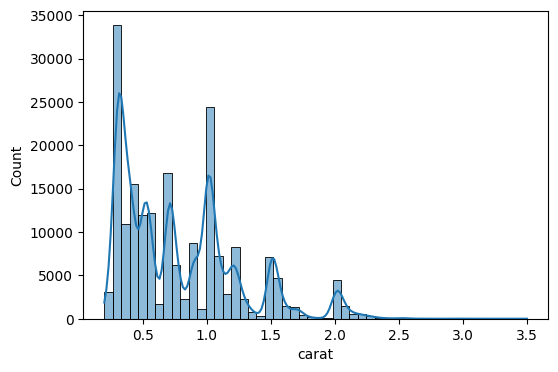

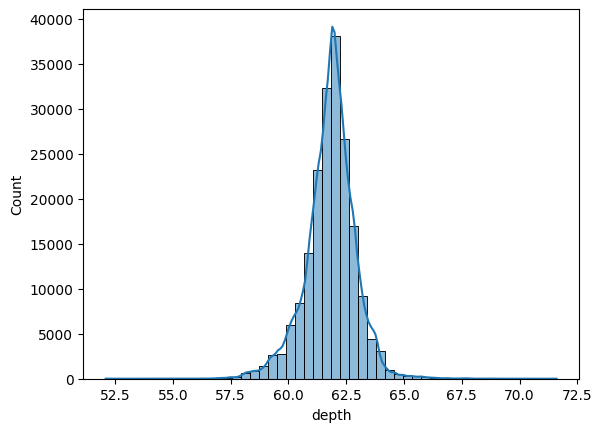

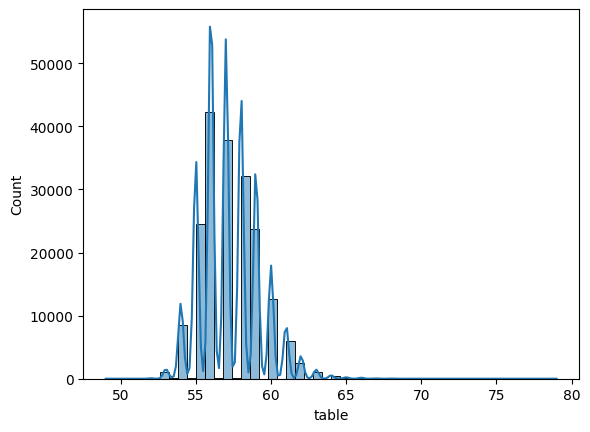

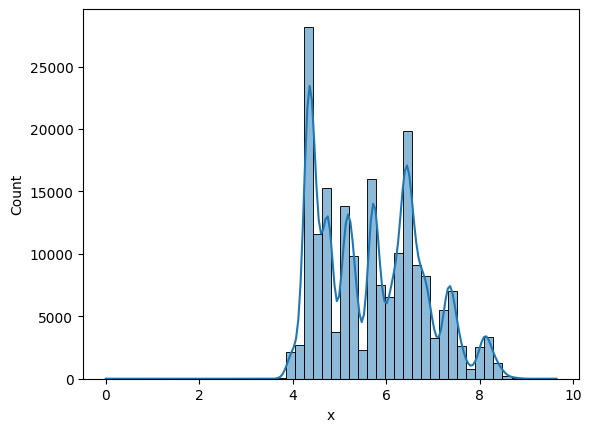

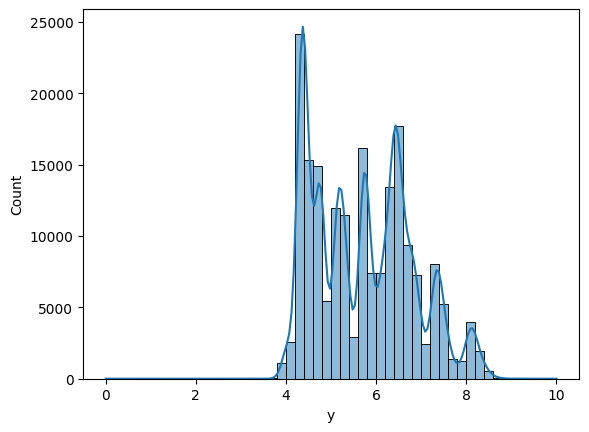

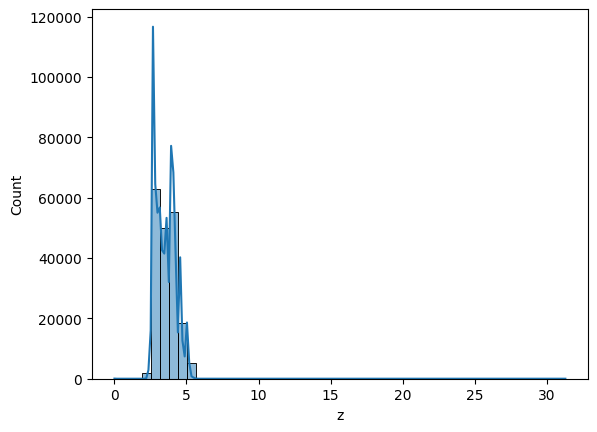

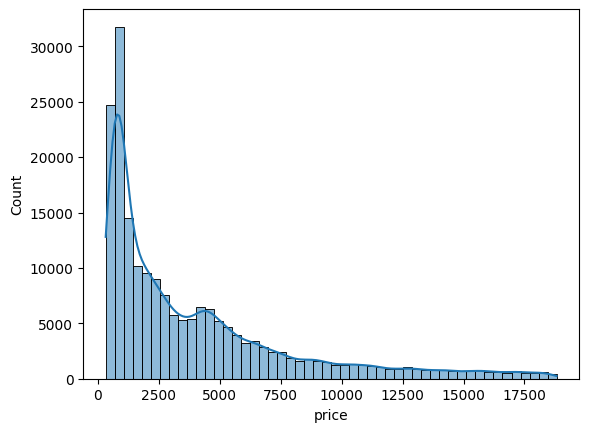

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))


for col in num_columns:
  sns.histplot(data=data, x=col, kde=True, bins=50)
  print("\n")
  plt.show()

<Axes: >

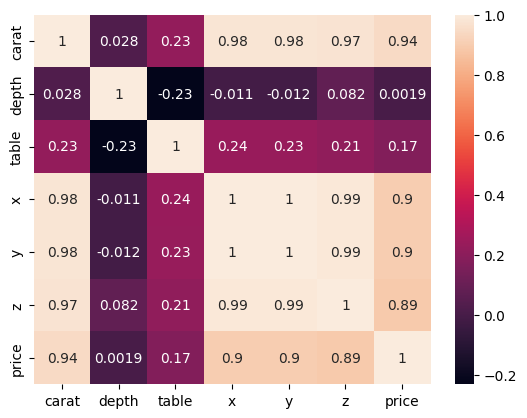

In [19]:
sns.heatmap(data[num_columns].corr(),annot=True)

In [20]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [21]:
# # It's a ordinal encodin{g

# cut_map = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
# clarity_map = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
# color_map = {'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7} 

In [22]:
# data['cut'] = data['cut'].map(cut_map)
# data["clarity"] = data['clarity'].map(clarity_map)
# data['color'] = data['color'].map(color_map)


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop(labels=['price'], axis=1)
y = data['price']

# Select categorical and numerical columns
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

# Define categories for ordinal encoding
cut_categories = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
clarity_categories = ["D", "E", "F", "G", "H", "I", "J"]
color_categories = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

# Numerical pipeline
numerical_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer()),  # Default strategy is 'mean'
    ('Scaler', StandardScaler())  # Add parentheses to instantiate the class
])

# Categorical pipeline
cat_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='most_frequent')),
    ('Ordinal Encoder', OrdinalEncoder(categories=[cut_categories, clarity_categories, color_categories]))
])

# Preprocessor combining both pipelines
'''`ColumnTransformer()` in scikit-learn allows you to apply different preprocessing pipelines to specific subsets of columns (e.g., numeric and categorical) in a single unified transformer.'''
preprocessor = ColumnTransformer([
    ("Numerical Pipeline", numerical_pipeline, num_cols),
    ("Categorical Pipeline", cat_pipeline, cat_cols)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

print("Preprocessing complete.")


Preprocessing complete.


In [24]:
X_train_transformed

array([[-1.01639515, -0.20431653,  0.4026079 , ...,  3.        ,
         1.        ,  2.        ],
       [ 0.88239567,  0.72075808, -0.1185356 , ...,  3.        ,
         2.        ,  3.        ],
       [ 1.52971072,  0.35072823, -1.16082259, ...,  4.        ,
         5.        ,  3.        ],
       ...,
       [ 0.92555001,  0.905773  ,  0.4026079 , ...,  3.        ,
         3.        ,  3.        ],
       [-1.03797232, -0.66685384, -0.63967909, ...,  2.        ,
         3.        ,  6.        ],
       [-1.03797232, -0.01930161,  0.9237514 , ...,  2.        ,
         3.        ,  1.        ]])

In [25]:
# To check the names of the transformed columns
preprocessor.get_feature_names_out()

array(['Numerical Pipeline__carat', 'Numerical Pipeline__depth',
       'Numerical Pipeline__table', 'Numerical Pipeline__x',
       'Numerical Pipeline__y', 'Numerical Pipeline__z',
       'Categorical Pipeline__cut', 'Categorical Pipeline__color',
       'Categorical Pipeline__clarity'], dtype=object)

In [26]:
X_train = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out())

In [27]:
X_train

,Numerical Pipeline__carat,Numerical Pipeline__depth,Numerical Pipeline__table,Numerical Pipeline__x,Numerical Pipeline__y,Numerical Pipeline__z,Categorical Pipeline__cut,Categorical Pipeline__color,Categorical Pipeline__clarity
0,-1.016395,-0.204317,0.402608,-1.202472,-1.187395,-1.194148,3.0,1.0,2.0
1,0.882396,0.720758,-0.118536,0.985177,0.941823,1.036109,3.0,2.0,3.0
2,1.529711,0.350728,-1.160823,1.426308,1.394848,1.441611,4.0,5.0,3.0
3,1.896523,0.073206,0.923751,1.741402,1.711965,1.702290,3.0,5.0,1.0
4,0.450852,1.738340,1.444895,0.562052,0.525040,0.703019,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
154853,-0.628006,-1.499421,1.966038,-0.545277,-0.516918,-0.643825,2.0,1.0,2.0
154854,2.414375,0.443236,2.487182,1.921455,1.875054,1.934005,2.0,2.0,2.0
154855,0.925550,0.905773,0.402608,0.994180,0.923702,1.050591,3.0,3.0,3.0
154856,-1.037972,-0.666854,-0.639679,-1.211475,-1.196455,-1.252077,2.0,3.0,6.0


In [28]:
X_test

,Numerical Pipeline__carat,Numerical Pipeline__depth,Numerical Pipeline__table,Numerical Pipeline__x,Numerical Pipeline__y,Numerical Pipeline__z,Categorical Pipeline__cut,Categorical Pipeline__color,Categorical Pipeline__clarity
0,-0.628006,0.258221,-0.118536,-0.599293,-0.580341,-0.571414,4.0,0.0,2.0
1,2.608569,-2.146973,-0.118536,2.128516,2.201232,1.962969,2.0,3.0,1.0
2,-1.124281,-1.221899,0.923751,-1.373523,-1.413907,-1.469310,3.0,1.0,6.0
3,-1.016395,-0.574346,0.923751,-1.157458,-1.160213,-1.194148,3.0,5.0,6.0
4,0.860819,0.628251,-0.639679,0.949167,0.987125,1.007145,4.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...
38710,0.472429,1.553325,0.923751,0.607065,0.543161,0.731983,1.0,5.0,2.0
38711,-1.037972,-0.481839,-1.160823,-1.157458,-1.142092,-1.179666,4.0,0.0,3.0
38712,0.235081,0.535743,3.008325,0.336985,0.371011,0.398893,2.0,2.0,2.0
38713,-0.628006,0.165713,1.444895,-0.536274,-0.580341,-0.542449,2.0,2.0,2.0


# **Model Training**

In [29]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [31]:
models = {

'Linear Regression': LinearRegression(),
'Lasso': Lasso(),
'Ridge': Ridge(),
'ElasticNet': ElasticNet(),
'Random Forest': RandomForestRegressor(),
'XGBoost': XGBRegressor()

}

In [32]:
trained_model_list = []
model_list = []
r2_list = []

In [33]:
list(models)

['Linear Regression',
 'Lasso',
 'Ridge',
 'ElasticNet',
 'Random Forest',
 'XGBoost']

In [35]:
for i in range(len(list(models))):
  model = list(models.values())[i]
  print(model)

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [38]:
models.keys()

dict_keys(['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet', 'Random Forest', 'XGBoost'])

In [40]:
list(models.values())

[LinearRegression(),
 Lasso(),
 Ridge(),
 ElasticNet(),
 RandomForestRegressor(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)]

In [54]:
list(models.values())[5]

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2


In [50]:
for i in range(len(list(models))):
    model = list(models.values())[i]
  
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation
    mae, mse, r2 = evaluate_model(y_test, y_pred)

    print("Model training performance", model)
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Squared Error : {mse}")  
    print(f"R2 Score : {r2}")

    r2_list.append(r2)

    print("================================================")
    print("\n")


Model training performance LinearRegression()
Mean Absolute Error : 671.5856392794415
Mean Squared Error : 1013245.5452810809
R2 Score : 0.9372975155452961


Model training performance Lasso()
Mean Absolute Error : 672.9964160404007
Mean Squared Error : 1013790.3860145371
R2 Score : 0.9372637992681518


Model training performance Ridge()
Mean Absolute Error : 671.6145636350983
Mean Squared Error : 1013256.1246827883
R2 Score : 0.93729686086216


Model training performance ElasticNet()
Mean Absolute Error : 1053.4176488002738
Mean Squared Error : 2298790.2373915045
R2 Score : 0.8577443939467992


Model training performance RandomForestRegressor()
Mean Absolute Error : 309.47346722559445
Mean Squared Error : 367639.3189967612
R2 Score : 0.9772494448244156


Model training performance XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
          

In [52]:
max(r2_list)

0.9787904894720847

In [1]:
# Prime numbers
a = [1,2,3,4,5,6,7,8,9]
for i in a:
  for j in a:
    if i == j:
      print(i)

1
2
3
4
5
6
7
8
9
